<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/COVID_19_and_its_Impact_on_Students_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코로나 19와 학생들에게 미친 영향 분석
- 사용 데이터: [COVID-19 and its Impact on Students](https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students/code)

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"calomy","key":"15442859a9e265eca0caf5f1fa5f2165"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지 
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d kunal28chaturvedi/covid19-and-its-impact-on-students

  0% 0.00/20.8k [00:00<?, ?B/s]
100% 20.8k/20.8k [00:00<00:00, 13.9MB/s]


In [4]:
!ls

covid19-and-its-impact-on-students.zip	kaggle.json  sample_data


In [5]:
! unzip covid19-and-its-impact-on-students.zip

Archive:  covid19-and-its-impact-on-students.zip
  inflating: COVID-19 Survey Student Responses.csv  


## 데이터 분석
- 델리 수도권(NCR)의 다양한 교육 기관에서 온 다양한 연령대의 학생 1,182명을 대상으로 수행한 횡단면 조사

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
student = pd.read_csv('/content/COVID-19 Survey Student Responses.csv')
student.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [8]:
student.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [9]:
del student['ID']

In [10]:
student.columns = ['region', 'Age', 'online_class', 'rating_online_class', 'medium_online_class', 'self_study', 
                   'fitness', 'sleep', 'social_media', 'social_media_platform', 'TV', 'meals_per_day', 'weight', 
                   'health_issue', 'stress', 'time utillzed', 'connected', 'miss']

In [11]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 1182 non-null   object 
 1   Age                    1182 non-null   int64  
 2   online_class           1182 non-null   float64
 3   rating_online_class    1158 non-null   object 
 4   medium_online_class    1131 non-null   object 
 5   self_study             1182 non-null   float64
 6   fitness                1182 non-null   float64
 7   sleep                  1182 non-null   float64
 8   social_media           1182 non-null   float64
 9   social_media_platform  1182 non-null   object 
 10  TV                     1182 non-null   object 
 11  meals_per_day          1182 non-null   int64  
 12  weight                 1182 non-null   object 
 13  health_issue           1182 non-null   object 
 14  stress                 1182 non-null   object 
 15  time

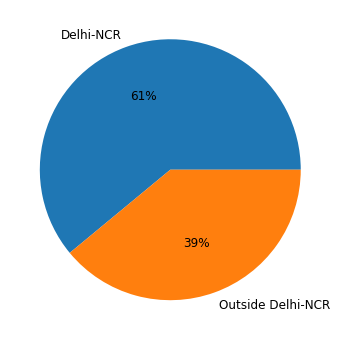

In [12]:
# region
Region = student['region'].value_counts()
plt.rcParams["figure.figsize"] = (12,6) # chart size
plt.pie(Region.values, labels=Region.index, autopct='%.f%%', textprops={'fontsize': 12})
plt.show()

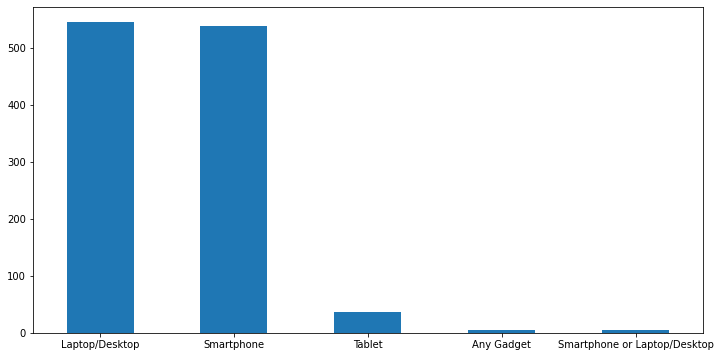

In [13]:
# Medium for online class
medium = student['medium_online_class'].value_counts()
medium_index = medium.index
medium_count = medium.values
# visualize bar graph
medium.plot.bar(x='medium_index', y='medium_count', rot=0)

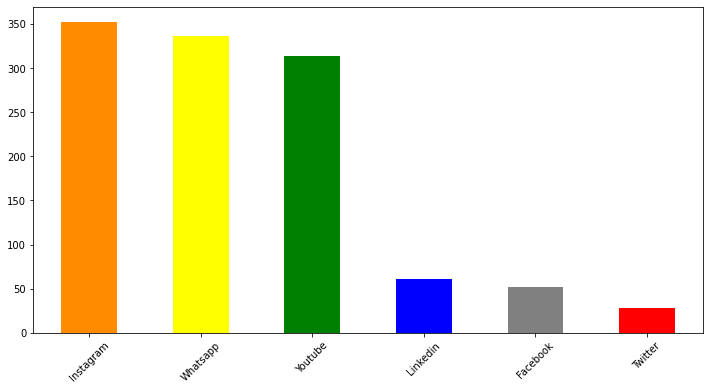

In [14]:
# Prefered social media platform
platform = student['social_media_platform'].value_counts()[:6]
platform_index = platform.index
platform_count = platform.values
# visualize bar graph
platform.plot.bar(x='platform_index', y='platform_count', color = ['#ff8c00', 'yellow', 'green', 'blue', 'gray', 'red'], rot=45)

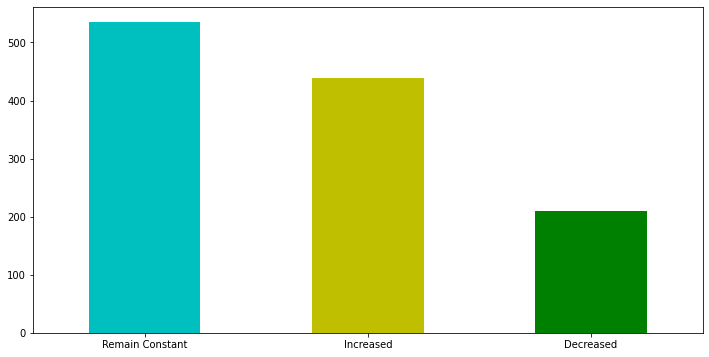

In [15]:
# Change in your weight
change_weight = student['weight'].value_counts()
change_weight_index = change_weight.index
change_weight_count = change_weight.values
# visualize bar graph
change_weight.plot.bar(x='change_weight_index', y='change_weight_count', color = ['c', 'y', 'g'], rot=0)

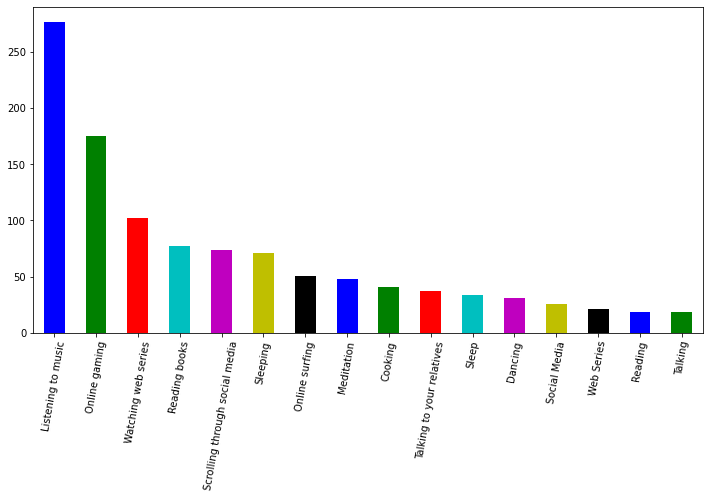

In [16]:
# stress busters
busters = student['stress'].value_counts()[:16]
busters_index = busters.index
busters_count = busters.values
# visualize bar graph
busters.plot.bar(x='busters_index', y='busters_count', color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'], rot=80)

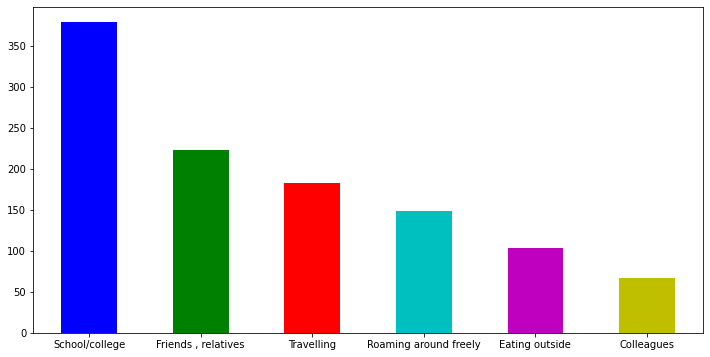

In [17]:
# What you miss the most
most_miss = student['miss'].value_counts()[:6]
most_miss_index = most_miss.index
most_miss_count = most_miss.values
# visualize bar graph
most_miss.plot.bar(x='most_miss_index', y='most_miss_count', color = ['b', 'g', 'r', 'c', 'm', 'y'], rot=0)

In [18]:
# mean
students = student[['Age', 'online_class', 'self_study', 'fitness', 'sleep', 'social_media', 'TV', 'meals_per_day']]
student_mean = students.groupby(['Age'], as_index=False).mean().round(1)
student_mean

,Age,online_class,self_study,fitness,sleep,social_media,meals_per_day
0,7,2.0,2.0,1.0,9.0,1.0,3.0
1,8,2.0,1.5,1.0,6.5,1.0,2.5
2,9,3.0,1.5,0.3,7.5,0.5,3.5
3,10,4.0,2.2,0.8,8.5,0.9,3.2
4,11,3.3,1.7,0.7,10.5,1.7,2.8
5,12,3.7,2.4,0.8,8.3,1.7,2.9
6,13,3.9,2.5,0.9,8.1,1.8,2.8
7,14,4.4,2.5,0.8,8.4,1.5,2.7
8,15,4.6,3.7,0.9,7.7,1.6,3.2
9,16,5.0,3.1,0.7,7.7,1.7,2.8


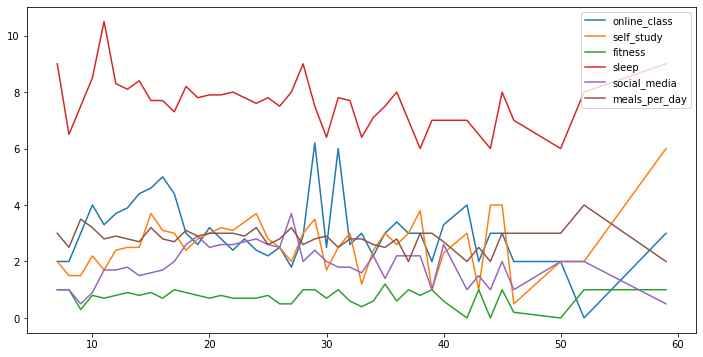

In [19]:
# visualize line graph
plt.plot(student_mean['Age'], student_mean['online_class'])
plt.plot(student_mean['Age'], student_mean['self_study'])
plt.plot(student_mean['Age'], student_mean['fitness'])
plt.plot(student_mean['Age'], student_mean['sleep'])
plt.plot(student_mean['Age'], student_mean['social_media'])
plt.plot(student_mean['Age'], student_mean['meals_per_day'])
plt.legend(['online_class', 'self_study', 'fitness', 'sleep', 'social_media', 'meals_per_day'])
plt.show()